In [1]:
import tensorflow as tf

In [1]:
import pandas as pd
import scipy as sp

import daft
#from matplotlib import rc

from abtools.bayesian import BinaryABModel

%matplotlib inline


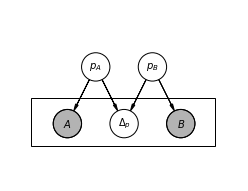

In [2]:
pgm = daft.PGM([4, 3], origin=[0, 0])
pgm.add_node(daft.Node("pA", r"$p_A$", 1.5, 2))
pgm.add_node(daft.Node("pB", r"$p_B$", 2.5, 2))
pgm.add_node(daft.Node("A_conv", r"$A$", 1, 1, aspect=1, observed=True))
pgm.add_node(daft.Node("B_conv", r"$B$", 3, 1, aspect=1, observed=True))
pgm.add_node(daft.Node("d_conv", r"$\Delta_{p}$", 2, 1, aspect=1))

pgm.add_edge('pA','A_conv')
pgm.add_edge('pB','B_conv')
pgm.add_edge('pA','d_conv')
pgm.add_edge('pB','d_conv')

pgm.add_plate(daft.Plate([0.35, 0.7, 3.25, 0.75], shift=-0.1))
pgm.render()

pgm.figure.savefig("conversion_model.png", dpi=350)

In [3]:
p = .05
size = 50000
delta_true = .03

y1 = pd.Series(sp.stats.bernoulli.rvs(p=p, size=size, random_state=8228))
y2 = pd.Series(sp.stats.bernoulli.rvs(p=p*(1+delta_true), size=size, random_state=8228))

print('Mean: %.4f, std: %.2f' % (y1.mean(), y1.std()))
print('Mean: %.4f, std: %.2f' % (y2.mean(), y2.std()))
print('y2 больше y1 на %.4f = %d%%' % (y2.mean()- y1.mean(), (y2.mean()/y1.mean()-1)*100))

Mean: 0.0506, std: 0.22
Mean: 0.0522, std: 0.22
y2 больше y1 на 0.0015 = 3%


In [4]:
model = BinaryABModel(y1, y2)
model.fit()

/usr/local/lib/python3.5/dist-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"
/usr/local/lib/python3.5/dist-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"


Optimization terminated successfully.
         Current function value: 20264.219070
         Iterations: 17
         Function evaluations: 22
         Gradient evaluations: 22


100%|██████████| 10000/10000 [00:08<00:00, 1238.87it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f99c107cbe0>], dtype=object)

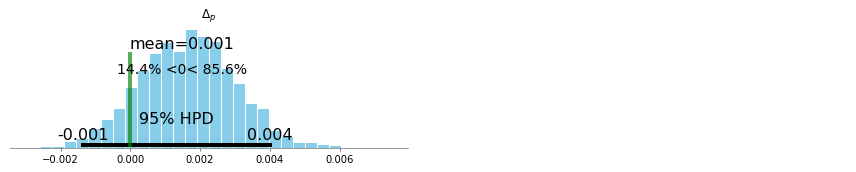

In [5]:
model.plot_deltas()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f99bf05cac8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f99be77eb38>], dtype=object)

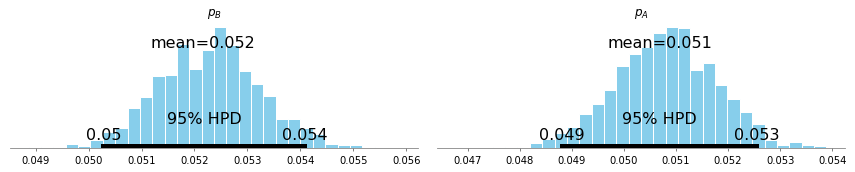

In [6]:
model.plot_params()